In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('../dataset/complete_dataset.csv')
#dfs is the original dataframe without slicing, since df would be used as a sliced dataframe later on 
dfs = df.sample(frac=1)
dfs.shape


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10927181, 19)

## Visualisation of the Dataset 

### **Original Dataframe**

In [3]:
print(dfs.shape)
dfs.head()

(10927181, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
1351286,NaN,NaN,tt0833187,NaN,NaN,NaN,NaN,NaN,nm0298413,nm0222358,tvEpisode,Summer Storm,Summer Storm,0.0,1968.0,NaN,NaN,6.0,8.0
4835941,NaN,NaN,tt1988727,NaN,NaN,NaN,NaN,NaN,"nm3950068,nm1264971",NaN,movie,Mr. Fascination,Mr. Fascination,0.0,2011.0,NaN,80,NaN,NaN
2148627,NaN,NaN,tt10594908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Black and White Photo,Black and White Photo,0.0,2009.0,NaN,NaN,NaN,NaN
8561293,NaN,NaN,tt6799526,NaN,NaN,NaN,NaN,NaN,nm4137964,nm4137964,short,Fail,Fail,0.0,2017.0,NaN,NaN,NaN,NaN
10526065,NaN,NaN,tt9459392,NaN,NaN,NaN,NaN,NaN,"nm3571141,nm6625765","nm3706001,nm8258238,nm8245357,nm9115584",tvEpisode,Episode #1.216,Episode #1.216,0.0,2009.0,NaN,NaN,NaN,NaN


### **Dataframe without NaN in text, genre, year and production_region**

In [4]:
df.dropna(subset=['text', 'genre', 'year', 'production_region'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
print(df.shape)
df.head()

(11557, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot Production 

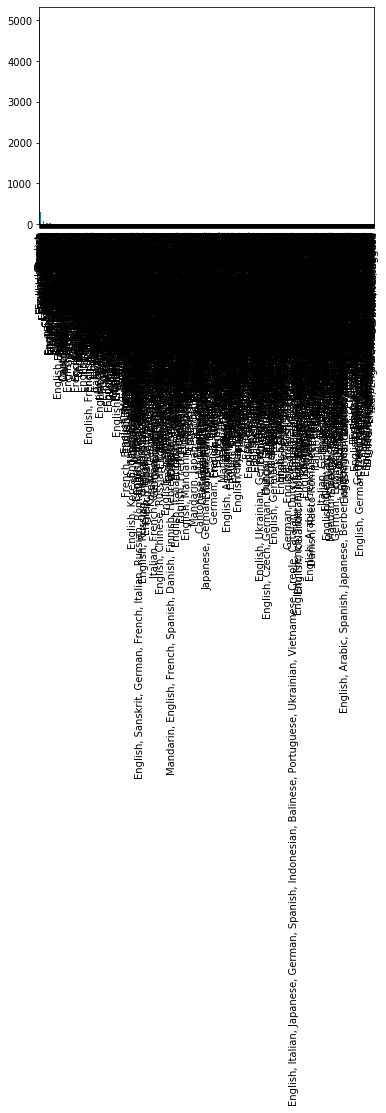

In [5]:
pd.value_counts(df['production_region']).plot.bar()

In [6]:
df.production_region.unique()
print(df.production_region.unique())


['French' 'English' 'Swedish' ... 'Chinese, English'
 'Spanish, English, Icelandic, Portuguese' 'Hebrew, English, Persian']


In [7]:
from collections import Counter
region_combination_frequs = Counter(df.production_region)
region_combination_frequs.most_common(20)

[('English', 5082),
 ('French', 799),
 ('German', 780),
 ('Japanese', 398),
 ('Italian', 306),
 ('English, Spanish', 252),
 ('English, French', 207),
 ('Spanish', 154),
 ('Korean', 119),
 ('English, German', 98),
 ('Mandarin', 95),
 ('Russian', 91),
 ('Swedish', 87),
 ('French, English', 82),
 ('English, Italian', 79),
 ('Cantonese', 79),
 ('English, Russian', 75),
 ('English, Japanese', 63),
 ('Turkish', 57),
 ('Danish', 52)]

In [8]:
production_country = []
for prod_country in df.production_region.unique():    
    each_country = prod_country.split(', ')
    production_country = production_country + each_country
print('Number of countries mentioned in the Dataset: ', len(production_country))
print(production_country)    

Number of countries mentioned in the Dataset:  4082
['French', 'English', 'Swedish', 'German', 'Slovak', 'Swedish', 'Danish', 'Russian', 'Polish', 'German', 'English', 'English', 'French', 'Spanish', 'Arabic', 'Italian', 'Spanish', 'English', 'Hungarian', 'Latin', 'Spanish', 'Hungarian', 'English', 'Latin', 'Portuguese', 'English', 'German', 'French', 'English', 'Russian', 'English', 'Arabic', 'French', 'English', 'French', 'Cantonese', 'German', 'English', 'Italian', 'Russian', 'Spanish', 'German', 'English', 'Spanish', 'English', 'German', 'Italian', 'English', 'French', 'English', 'Polynesian', 'English', 'Italian', 'English', 'Cantonese', 'Latin', 'English', 'German', 'English', 'Arabic', 'Czech', 'English', 'Portuguese', 'French', 'German', 'English', 'Russian', 'English', 'Mandarin', 'English', 'Hebrew', 'French', 'English', 'English', 'German', 'French', 'Italian', 'English', 'Latin', 'German', 'English', 'Esperanto', 'English', 'Welsh', 'English', 'French', 'German', 'Italian',

In [9]:
a = []
for y in production_country:
    if y not in a:
        a.append(y)
print(a)

['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American Sign Language', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French Sign Language', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian Sign Language', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'S

In [10]:
countries = a
new_countries = []
for country in countries:
    new_country = country.replace(' Sign Language', '')
    new_countries.append(new_country)
print('number of countries with sign languages: ', len(countries))
print(countries)


print('number of countries without sign languages: ', len(new_countries))
print(new_countries)

number of countries with sign languages:  172
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American Sign Language', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French Sign Language', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian Sign Language', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian',

In [11]:
print(new_countries)

['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'Saami', 'Scanian', 'Bambara', 'Fulah', 'Aze

In [12]:
filtered_country = []
for y in new_countries:
    if y not in filtered_country:
        filtered_country.append(y)
print('number of countries without sign languages(filtered): ', len(filtered_country))
print(filtered_country)

number of countries without sign languages(filtered):  167
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Push

In [13]:
type(filtered_country)

list

# Clustering über Regionen mit Embeddings


In [14]:
from pathlib import Path
import numpy as np
def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >=2 :
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [15]:
filenames, embeddings = read_embeddings('../dataset/embeddings_mean.txt')

In [16]:
filenames.shape, embeddings.shape

((34473,), (34473, 300))

In [17]:
df = df[df['filename'].isin(filenames)].copy()
df.shape

(11547, 19)

# Split Region

In [18]:
North_AmericaValue = 'English'
EuropeValue = 'France'
North_America = df.production_region = North_AmericaValue
Europe = df.production_region = EuropeValue
production_regions = North_AmericaValue + EuropeValue
colorlist = []

for x in df.production_region:
    if x =='English':
        colorlist.append('red')
    elif x =='French':
        colorlist.append('blue')
    else: 
        colorlist.append('white')

In [19]:
df['labelcolor']=colorlist

In [20]:
pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)

AttributeError: 'DataFrame' object has no attribute 'colors'

# K-Means

In [ ]:
model = KMeans(n_clusters=2)
model.fit(embeddings)

In [ ]:
len(model.labels_)

# Split without Embedding


In [ ]:
colors = []
for x in df.production_region:
    if x =='English':
        colors.append('red')
    elif x =='French':
        colors.append('blue')
    else: 
        colors.append('white')
dfs['colors']=colors

pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)
